In [199]:
import numpy as np
import pickle
import string

from collections import Counter
from matplotlib import pyplot as plt
from os import listdir
import math as mt


def get_most_frequent_words(all_words, k):
    counter = Counter(all_words)
    return [pair[1] / len(all_words) for pair in counter.most_common(k)]
    
    
def get_most_frequent_words_in_files(texts, k=5000):
    punct_remover = str.maketrans('', '', string.punctuation)

    all_words = [word for text in texts for word in text.translate(punct_remover).lower().split()]
    return get_most_frequent_words(all_words, k)

In [200]:
def approximate_zipf(top_words, hubs=None):
    n_cols = max(mt.floor(mt.sqrt(len(top_words))), 1)
    n_rows = max(mt.ceil(len(top_words) / n_cols), 1)
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10))
    fig.tight_layout(h_pad = 2, w_pad = 3)

    if n_cols == 1 or n_cols == 1:
        axs = [axs]
        if n_cols == 1 and n_cols == 1:
          axs = [axs]

    for i, freqs in enumerate(top_words):
        col = i%n_cols
        row = (int(i/n_cols)%max(n_rows,n_cols))

        best_s = 1
        best_k = 1
        best_loss = 1e9
        
        for s in np.linspace(0.25, 3.0, 100):    
            k = np.mean(freqs * (np.arange(1, len(freqs) + 1)**s))
            loss = np.mean((freqs - k/(np.arange(1, len(freqs) + 1)**s))**2)
            
            if loss < best_loss:
                best_loss, best_s, best_k = loss, s, k
        
        print((hubs[i] + ': ' if hubs else '') + 'mse', best_loss)
        axs[row][col].plot(freqs)
        axs[row][col].plot(
            best_k / (np.arange(1, len(freqs) + 1)**best_s),
            label='$\\frac{' + str(round(best_k, 3)) + '}{r^{' + str(round(best_s, 3)) + '}}$'
        )
        axs[row][col].legend(fontsize=18)
        axs[row][col].set_title(f'Top {len(freqs)} words' + (' for "' + hubs[i] + '"' if hubs else ''))
    plt.show()

#Для всего корпуса

In [201]:
texts = [pickle.load(open(f'clean_files/{filename}', 'rb'))['text']\
             for filename in listdir('clean_files')]

In [202]:
top_words = get_most_frequent_words_in_files(texts)

mse 7.4153103697921255e-06


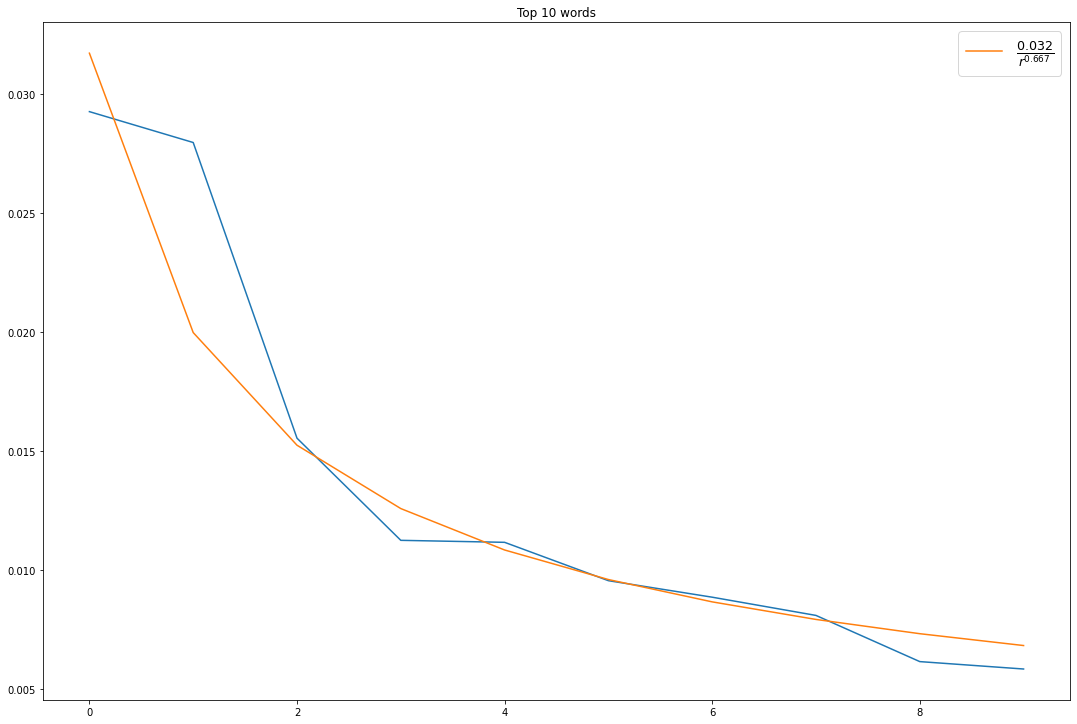

In [203]:
approximate_zipf([top_words[:10]])

mse 1.1101142377338063e-06


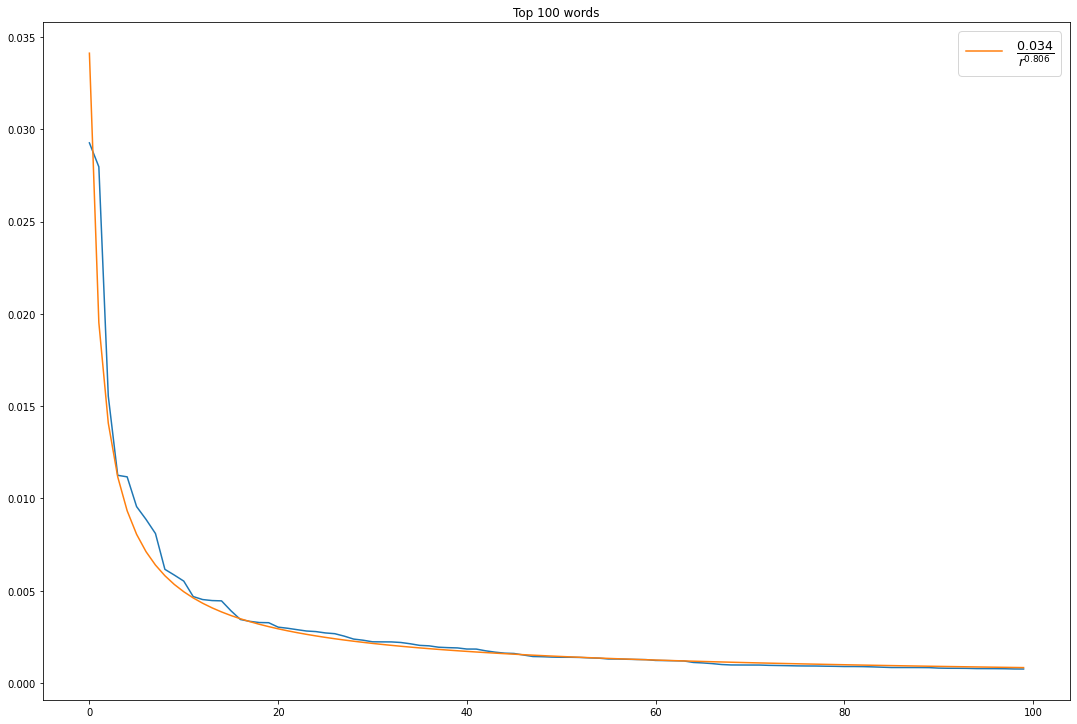

In [204]:
approximate_zipf([top_words[:100]])

mse 2.463765314297716e-07


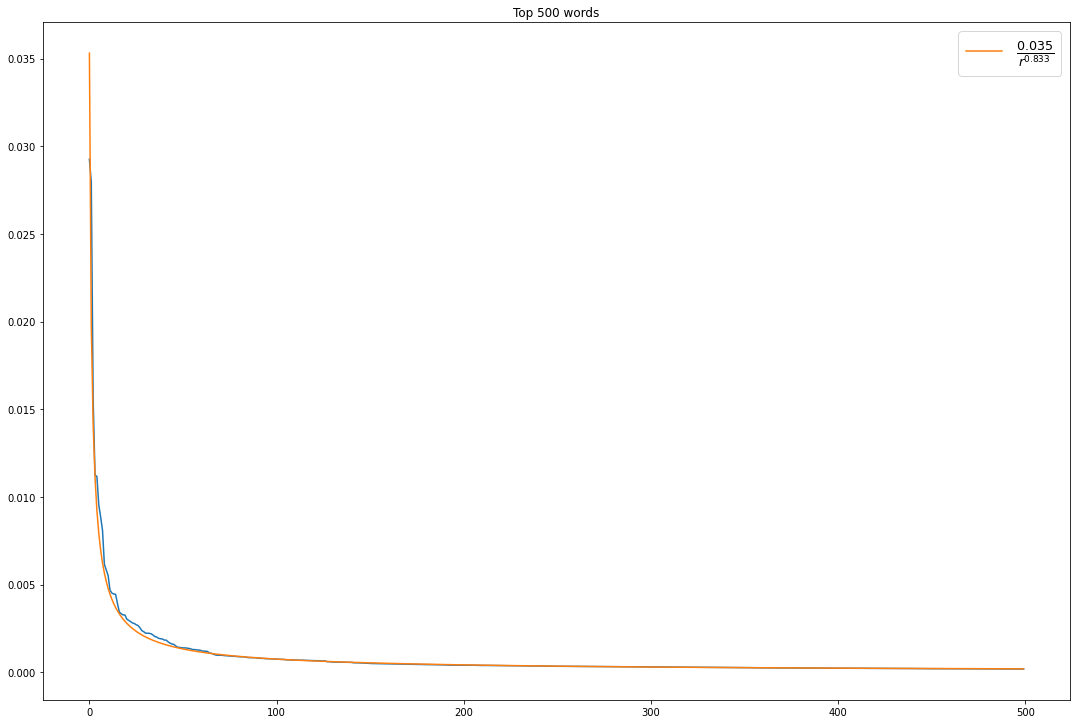

In [205]:
approximate_zipf([top_words[:500]])

mse 1.2886736813189674e-07


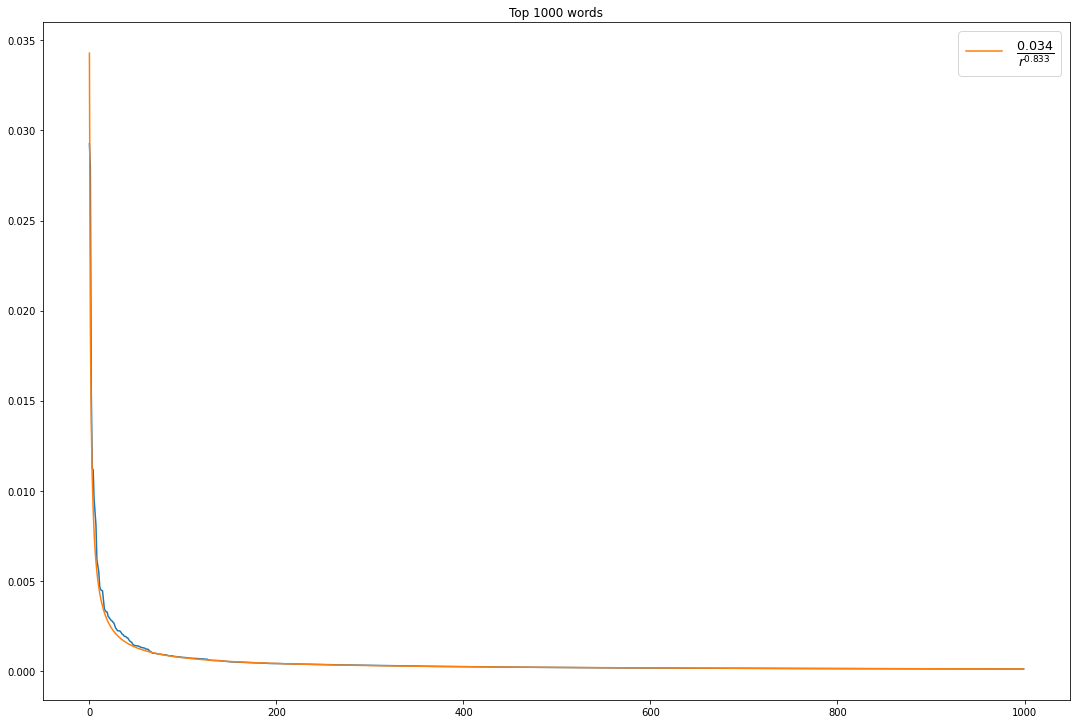

In [206]:
approximate_zipf([top_words[:1000]])

mse 2.8607060064291543e-08


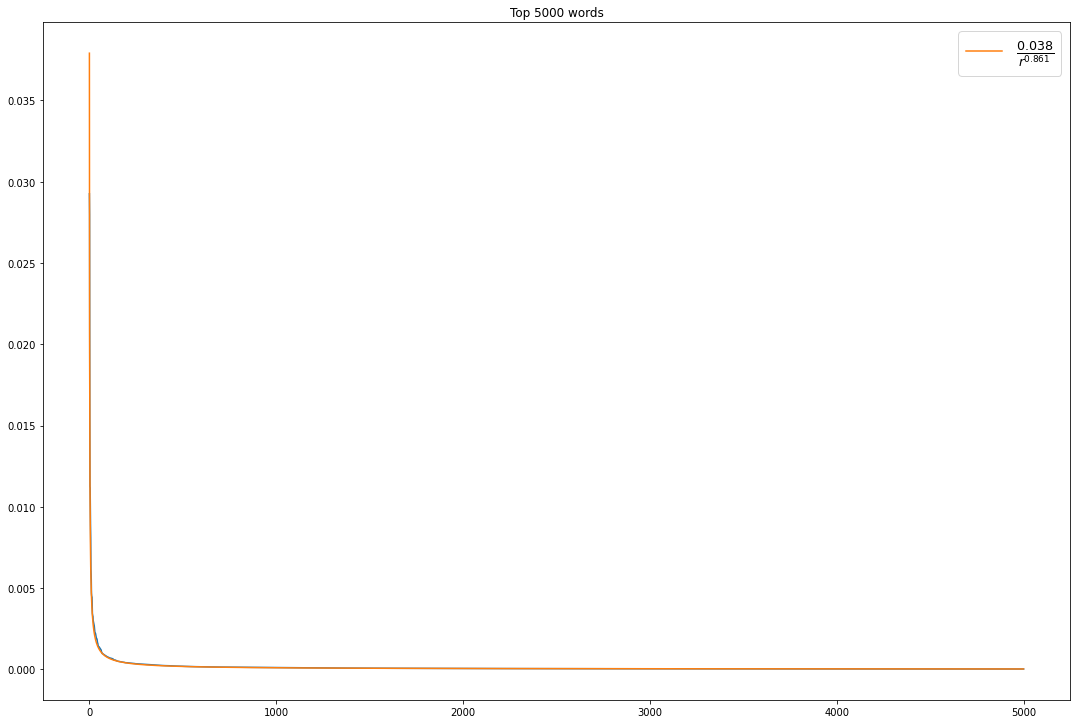

In [207]:
approximate_zipf([top_words[:5000]])

#По отдельным темам

In [208]:
data = [pickle.load(open(f'clean_files/{filename}', 'rb')) for filename in listdir('clean_files')]
hubs = ['научно-популярное', 
        'гаджеты', 
        'программирование', 
        'космонавтика', 
        'it-компании']

In [209]:
top_words = [get_most_frequent_words_in_files([text['text']
                                               for text in data if hub in [t.lower()
                                               for t in text['hubs'].split()]])
                                              for hub in hubs]

In [210]:
data[1]['hubs'].split()

['Научно-популярное,', 'Будущее', 'здесь']

научно-популярное: mse 7.983765378158898e-06
гаджеты: mse 9.352155190447564e-06
программирование: mse 3.5413012565940104e-06
космонавтика: mse 9.239717884499134e-06
it-компании: mse 5.736022969053487e-06


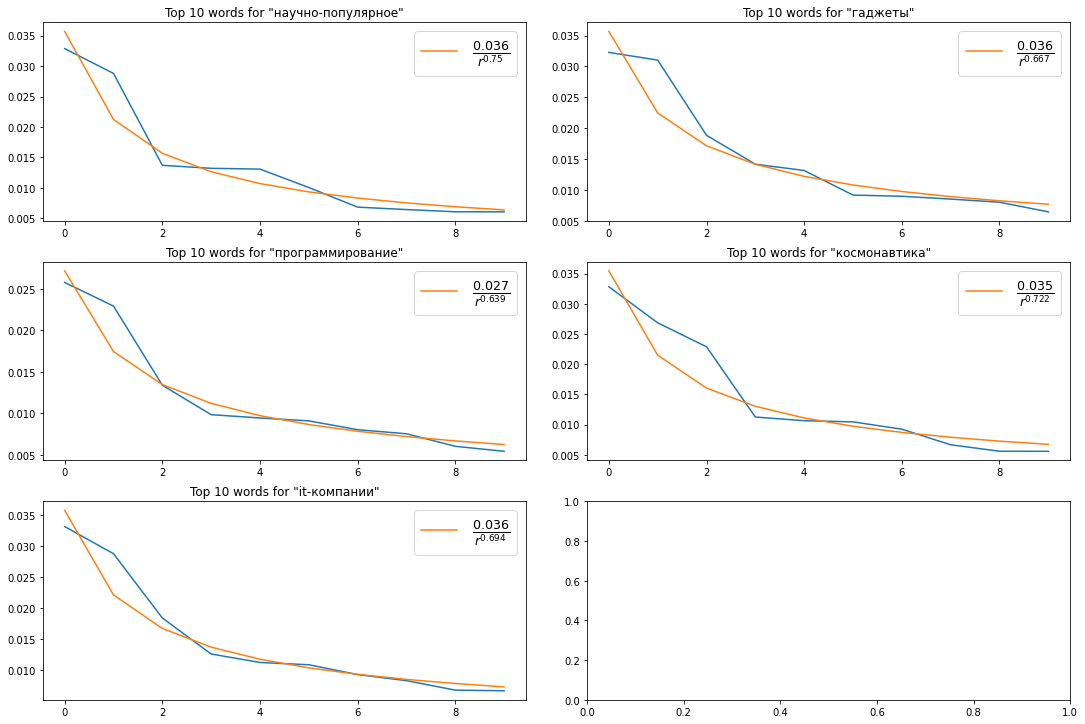

In [211]:
approximate_zipf([tw[:10] for tw in top_words], hubs)

научно-популярное: mse 9.928626684509618e-07
гаджеты: mse 1.6040366500276194e-06
программирование: mse 5.008278645494328e-07
космонавтика: mse 1.23790406348717e-06
it-компании: mse 9.822479498548717e-07


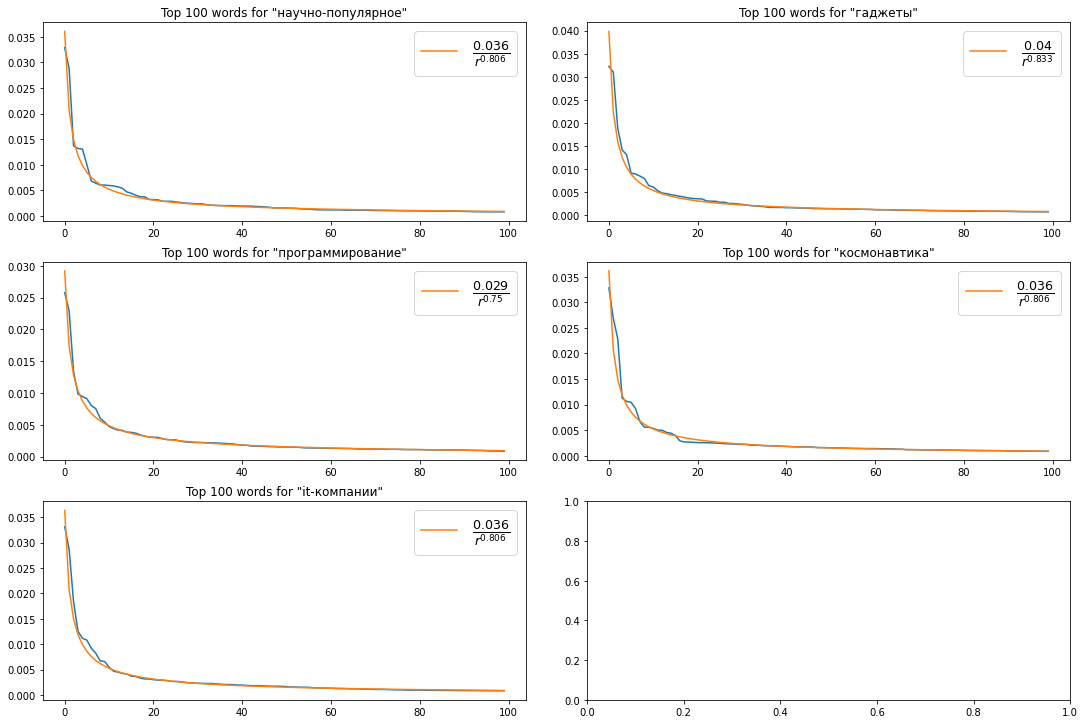

In [212]:
approximate_zipf([tw[:100] for tw in top_words], hubs)

научно-популярное: mse 2.1533505876394525e-07
гаджеты: mse 3.246615384913938e-07
программирование: mse 1.1498558674376137e-07
космонавтика: mse 2.570129349347685e-07
it-компании: mse 2.0538296500165763e-07


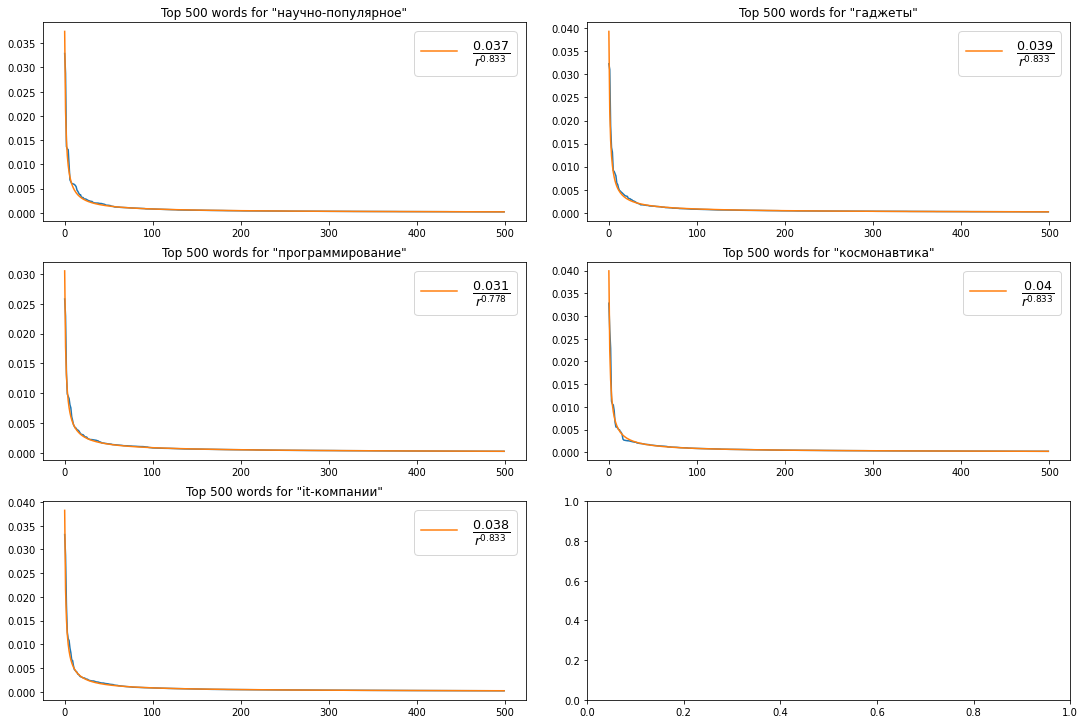

In [213]:
approximate_zipf([tw[:500] for tw in top_words], hubs)

научно-популярное: mse 1.0908579602232804e-07
гаджеты: mse 1.6059398315348185e-07
программирование: mse 5.997193525495417e-08
космонавтика: mse 1.2742981627515094e-07
it-компании: mse 1.0538561472116642e-07


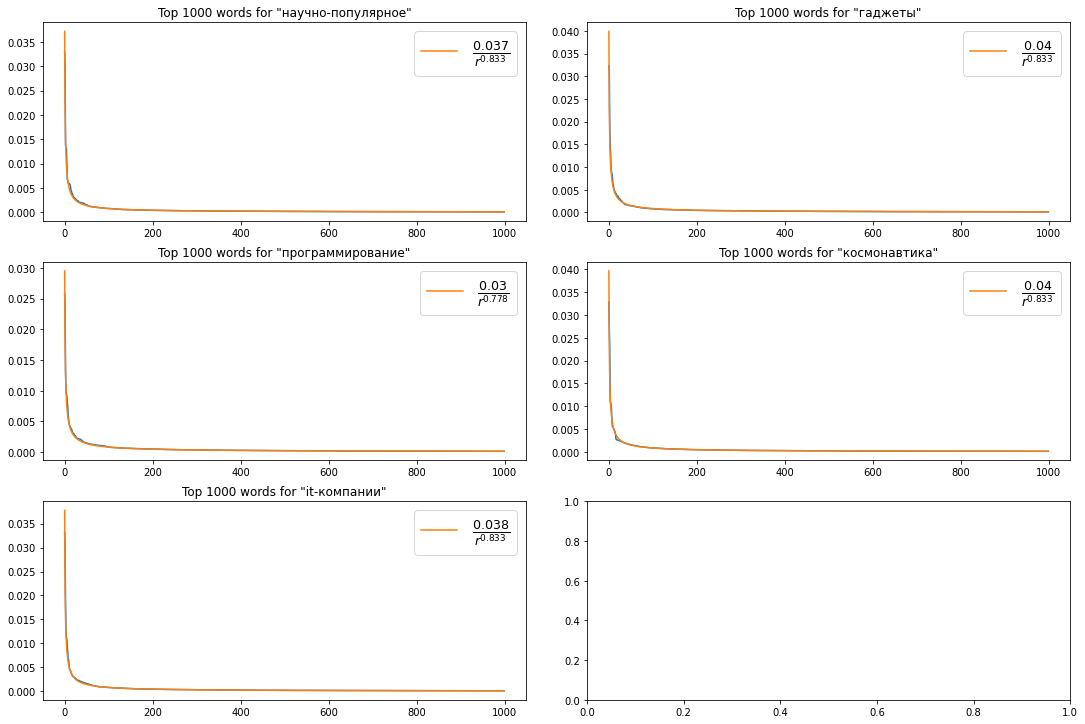

In [214]:
approximate_zipf([tw[:1000] for tw in top_words], hubs)

научно-популярное: mse 2.5964311153817008e-08
гаджеты: mse 3.8630384711393445e-08
программирование: mse 1.5341579362106417e-08
космонавтика: mse 3.0905422266439534e-08
it-компании: mse 2.5603964034431496e-08


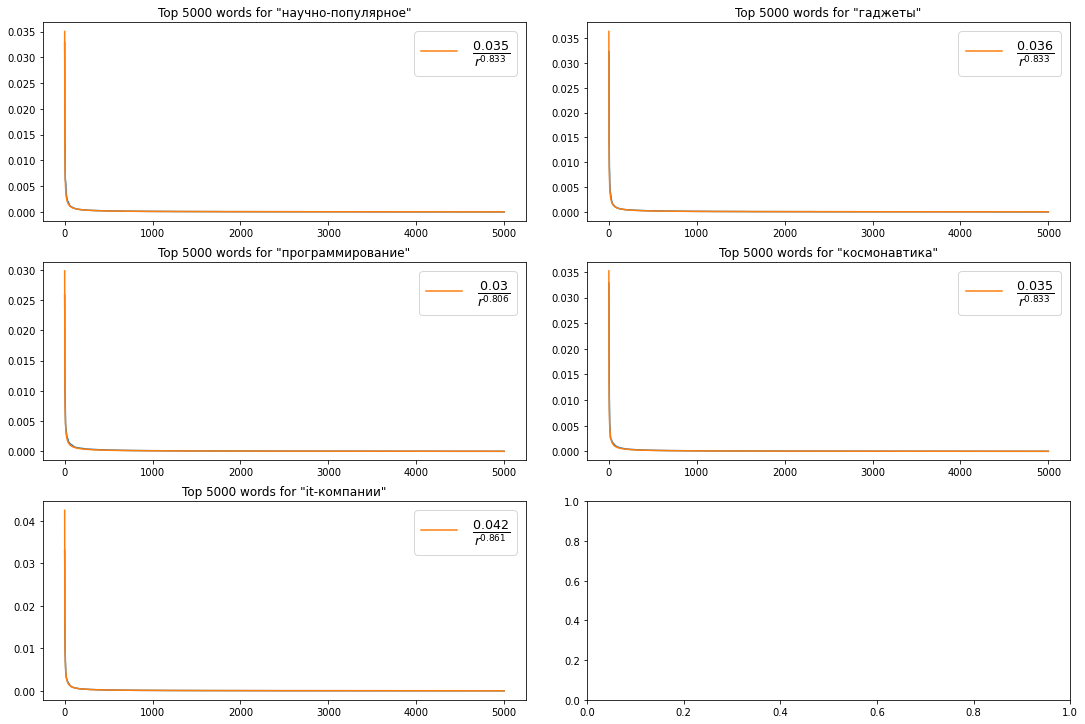

In [215]:
approximate_zipf([tw[:5000] for tw in top_words], hubs)